# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,waitangi,-43.9535,-176.5597,15.10,88,100,15.22,NZ,1747521044
1,1,port elizabeth,-33.9180,25.5701,19.62,99,71,1.34,ZA,1747521045
2,2,kolin,50.0281,15.2006,7.91,87,100,3.13,CZ,1747521046
3,3,mbandjok,4.4500,11.9000,21.03,98,100,0.42,CM,1747521047
4,4,fereydun kenar,36.6864,52.5225,17.28,83,0,3.75,IR,1747521048


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

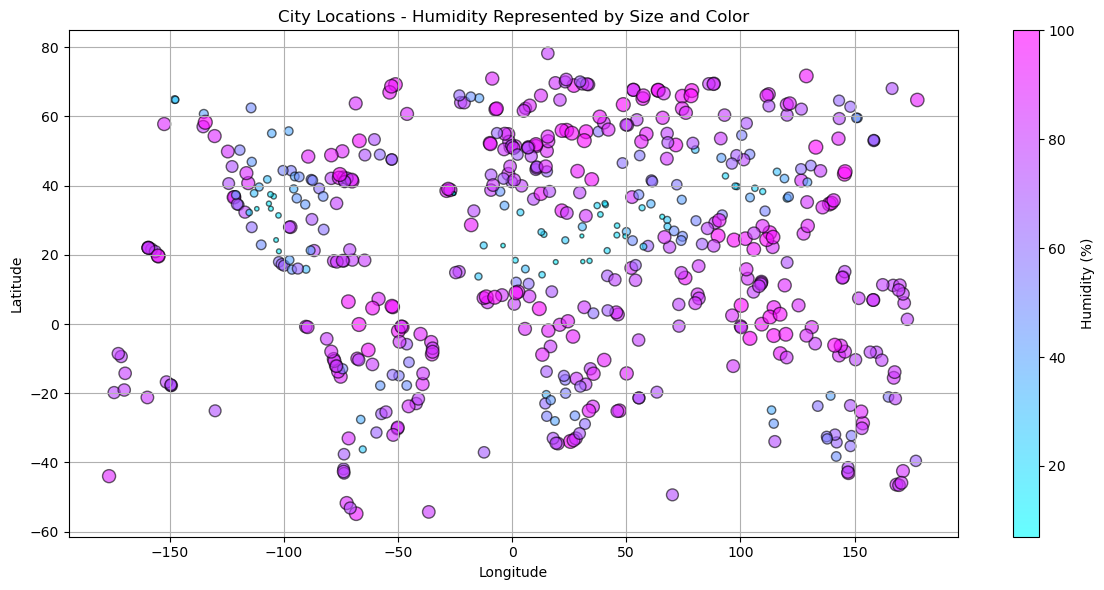

In [15]:
import matplotlib.pyplot as plt
import geopandas as gpd



city_data_filtered = city_data_df[city_data_df["Humidity"] > 0]
# Configure the map plot
gdf = gpd.GeoDataFrame(
    city_data_filtered,
    geometry=gpd.points_from_xy(city_data_filtered["Lng"], city_data_filtered["Lat"]),
    crs="EPSG:4326"
)
# Plot with Matplotlib
plt.figure(figsize=(12, 6))
plt.scatter(
    gdf["Lng"], 
    gdf["Lat"], 
    s=gdf["Humidity"],       # size reflects humidity
    c=gdf["Humidity"],       # color also reflects humidity
    cmap="cool", 
    alpha=0.6,
    edgecolor="black"
)
plt.colorbar(label="Humidity (%)")
plt.title("City Locations - Humidity Represented by Size and Color")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [16]:
# Narrow down cities that fit criteria and drop any results with null values
ideal_cities_df = city_data_df[
    (city_data_df["Max Temp"] >= 20) &
    (city_data_df["Max Temp"] <= 30) &
    (city_data_df["Humidity"] < 50) &
    (city_data_df["Cloudiness"] < 20)
]


# Drop any rows with null values
ideal_cities_df = ideal_cities_df.dropna()

# Display sample data
ideal_cities_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
43,43,rahimah,26.7079,50.0619,27.93,34,0,8.09,SA,1747521093
137,137,kandahar,31.0000,65.7500,24.61,13,0,4.71,AF,1747521204
139,139,puerto quijarro,-17.7833,-57.7667,25.80,44,1,1.21,BO,1747521206
144,144,al hufuf,25.3646,49.5653,26.84,12,0,5.94,SA,1747521212
233,233,ruidoso,33.3317,-105.6730,21.69,12,11,12.59,US,1747521311


### Step 3: Create a new DataFrame called `hotel_df`.

In [17]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = ideal_cities_df[["City", "Country", "Lat", "Lng", "Humidity"]].copy()


# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df["Hotel Name"] = ""

# Display sample data
hotel_df.head()


,City,Country,Lat,Lng,Humidity,Hotel Name
43,rahimah,SA,26.7079,50.0619,34,
137,kandahar,AF,31.0000,65.7500,13,
139,puerto quijarro,BO,-17.7833,-57.7667,44,
144,al hufuf,SA,25.3646,49.5653,12,
233,ruidoso,US,33.3317,-105.6730,12,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [21]:
import requests

# Set parameters to search for a hotel
radius = 10000 # Radius in meters (you can adjust this as needed)
params = {
    'categories': 'accommodation.hotel',  # We are looking for hotels
    'limit': 1,  # Limit to 1 hotel per request for simplicity
    'apiKey': geoapify_key  # Your Geoapify API key
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude, longitude from the DataFrame
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Add the current city's latitude and longitude to the params dictionary
    params["lat"] = lat
    params["lon"] = lng
    params["radius"] = radius

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    name_address = response.json()  # Here we should use 'response' instead of 'name_address'

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
print(hotel_df.head())


Starting hotel search
rahimah - nearest hotel: No hotel found
kandahar - nearest hotel: No hotel found
puerto quijarro - nearest hotel: No hotel found
al hufuf - nearest hotel: No hotel found
ruidoso - nearest hotel: No hotel found
cabo san lucas - nearest hotel: No hotel found
hami - nearest hotel: No hotel found
albu kamal - nearest hotel: No hotel found
hafar al-batin - nearest hotel: No hotel found
jaisalmer - nearest hotel: No hotel found
turabah - nearest hotel: No hotel found
harnai - nearest hotel: No hotel found
big stone gap - nearest hotel: No hotel found
al minya - nearest hotel: No hotel found
subaykhan - nearest hotel: No hotel found
tumayr - nearest hotel: No hotel found
tabas - nearest hotel: No hotel found
doctor alberto oviedo mota - nearest hotel: No hotel found
andalgala - nearest hotel: No hotel found
newman - nearest hotel: No hotel found
                City Country      Lat       Lng  Humidity      Hotel Name
43           rahimah      SA  26.7079   50.0619      

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

C:\Users\evere\AppData\Local\Temp\ipykernel_28276\2168347530.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


AttributeError: module 'fiona' has no attribute 'path'

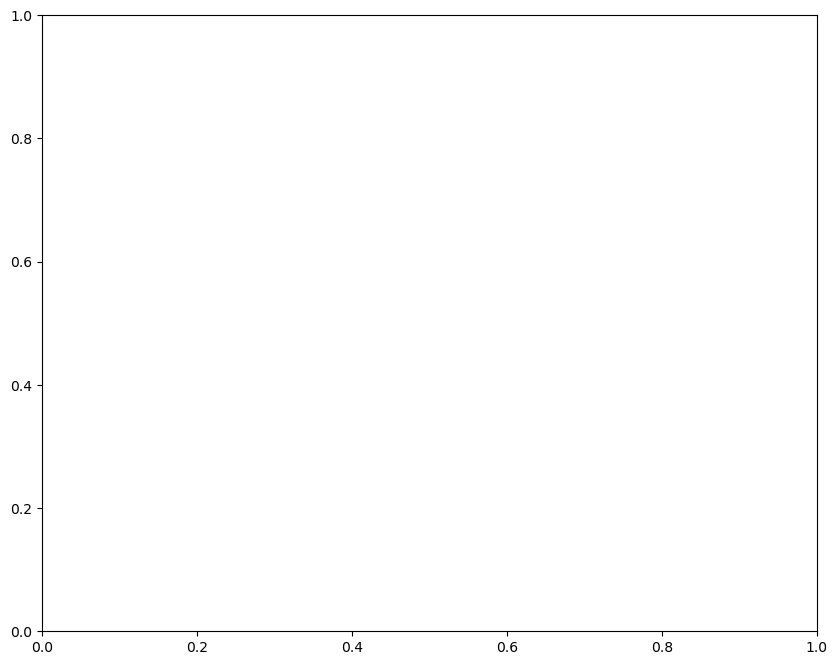

In [25]:
# Create a GeoDataFrame for plotting
gdf = gpd.GeoDataFrame(
    hotel_df_filtered,
    geometry=gpd.points_from_xy(hotel_df_filtered.Lng, hotel_df_filtered.Lat),
    crs="EPSG:4326"  # Coordinate reference system set to WGS84 (lat/lng)
)

# Filter out rows with no hotel found
hotel_df_filtered = hotel_df[hotel_df['Hotel Name'] != 'No hotel found']

# Create a GeoDataFrame for plotting
gdf = gpd.GeoDataFrame(
    hotel_df_filtered,
    geometry=gpd.points_from_xy(hotel_df_filtered.Lng, hotel_df_filtered.Lat),
    crs="EPSG:4326"  # Coordinate reference system set to WGS84 (lat/lng)
)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the world map (background)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgray')

# Plot cities with humidity as size
gdf.plot(
    ax=ax,
    marker='o',
    color='blue',  # Color of the markers
    markersize=gdf['Humidity'] / 10,  # Scale size according to humidity
    alpha=0.7,
    label='Cities'
)

# Add labels for each city
for idx, row in gdf.iterrows():
    ax.text(
        row['Lng'], row['Lat'], row['City'], 
        fontsize=8, ha='right', color='black'
    )

# Add title
ax.set_title("City Map with Hotels and Humidity", fontsize=16)

# Customize axis labels
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Display the plot
plt.show()